## Feature Selection by  Correlation Statistics
###  Dataset - Numerical input data and a Numerical target variable

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [3]:
house_dataset = pd.read_csv('D:\Data for Preprocessing\Housing.csv')

In [4]:
house_dataset

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished,1330000
1,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished,1225000
2,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished,1225000
3,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,1221500
4,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished,1141000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,3000.0,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished,182000
550,2400.0,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished,176715
551,3620.0,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished,175000
552,2910.0,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished,175000


In [5]:
house_dataset.dropna(axis=0, inplace=True)

In [6]:
house_dataset

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420.0,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished,1330000
1,8960.0,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished,1225000
2,9960.0,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished,1225000
3,7500.0,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished,1221500
4,7420.0,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished,1141000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,3000.0,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished,182000
550,2400.0,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished,176715
551,3620.0,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished,175000
552,2910.0,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished,175000


In [7]:
house_dataset.groupby('furnishingstatus')['price'].sum().reset_index()

,furnishingstatus,price
0,furnished,76939744
1,semi-furnished,111400800
2,unfurnished,71446200


In [8]:
house_dataset['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [9]:
house_dataset.replace({'yes': 1, 'no': 0}, inplace=True)

In [10]:
house_dataset

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,furnished,1330000
1,8960.0,4.0,4.0,4.0,1,0,0,0,1,3.0,0,furnished,1225000
2,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,semi-furnished,1225000
3,7500.0,4.0,2.0,2.0,1,0,1,0,1,3.0,1,furnished,1221500
4,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,furnished,1141000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,3000.0,2.0,1.0,1.0,1,0,1,0,0,2.0,0,unfurnished,182000
550,2400.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,semi-furnished,176715
551,3620.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,unfurnished,175000
552,2910.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,furnished,175000


In [11]:
house_dataset = pd.get_dummies(house_dataset, columns=['furnishingstatus'], prefix=['furnishingstatus'])

In [12]:
house_dataset

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,1330000,1,0,0
1,8960.0,4.0,4.0,4.0,1,0,0,0,1,3.0,0,1225000,1,0,0
2,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1225000,0,1,0
3,7500.0,4.0,2.0,2.0,1,0,1,0,1,3.0,1,1221500,1,0,0
4,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,1141000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,3000.0,2.0,1.0,1.0,1,0,1,0,0,2.0,0,182000,0,0,1
550,2400.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,176715,0,1,0
551,3620.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,175000,0,0,1
552,2910.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,175000,1,0,0


In [13]:
house_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 553
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             545 non-null    float64
 1   bedrooms                         545 non-null    float64
 2   bathrooms                        545 non-null    float64
 3   stories                          545 non-null    float64
 4   mainroad                         545 non-null    int64  
 5   guestroom                        545 non-null    int64  
 6   basement                         545 non-null    int64  
 7   hotwaterheating                  545 non-null    int64  
 8   airconditioning                  545 non-null    int64  
 9   parking                          545 non-null    float64
 10  prefarea                         545 non-null    int64  
 11  price                            545 non-null    int64  
 12  furnishingstatus_furni

In [14]:
house_dataset.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'price', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [15]:
X  = house_dataset.loc[: , ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
        'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'] ] 

In [16]:
y = house_dataset['price']

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split


In [18]:
# Split the Data into Train and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
# Configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')

# Learn relationship from training dataset
fs.fit(X_train, y_train)

# Transform train input data
X_train_fs = fs.transform(X_train)

# Transform test input 
X_test_fs = fs.transform(X_test)


In [20]:
fs_score = pd.DataFrame(fs.scores_)

In [21]:
fs_score

,0
0,162.457431
1,67.115245
2,189.659645
3,93.814142
4,47.645214
5,38.215931
6,22.501396
7,6.147324
8,89.671600
9,77.207232


In [22]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420.0,4.0,2.0,3.0,1,0,0,0,1,2.0,1,1,0,0
1,8960.0,4.0,4.0,4.0,1,0,0,0,1,3.0,0,1,0,0
2,9960.0,3.0,2.0,2.0,1,0,1,0,0,2.0,1,0,1,0
3,7500.0,4.0,2.0,2.0,1,0,1,0,1,3.0,1,1,0,0
4,7420.0,4.0,1.0,2.0,1,1,1,0,1,2.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,3000.0,2.0,1.0,1.0,1,0,1,0,0,2.0,0,0,0,1
550,2400.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,0,1,0
551,3620.0,2.0,1.0,1.0,1,0,0,0,0,0.0,0,0,0,1
552,2910.0,3.0,1.0,1.0,0,0,0,0,0,0.0,0,1,0,0


In [23]:
fs_score.index = X.columns

In [24]:
fs_score

,0
area,162.457431
bedrooms,67.115245
bathrooms,189.659645
stories,93.814142
mainroad,47.645214
guestroom,38.215931
basement,22.501396
hotwaterheating,6.147324
airconditioning,89.671600
parking,77.207232


In [25]:
fs_score.rename({0:'Score'}, axis=1, inplace=True)

In [26]:
fs_score.sort_values(by = ['Score'],ascending=False, inplace=True)

In [27]:
fs_score

,Score
bathrooms,189.659645
area,162.457431
stories,93.814142
airconditioning,89.671600
parking,77.207232
bedrooms,67.115245
prefarea,52.613943
mainroad,47.645214
guestroom,38.215931
furnishingstatus_unfurnished,36.364521


<AxesSubplot:>

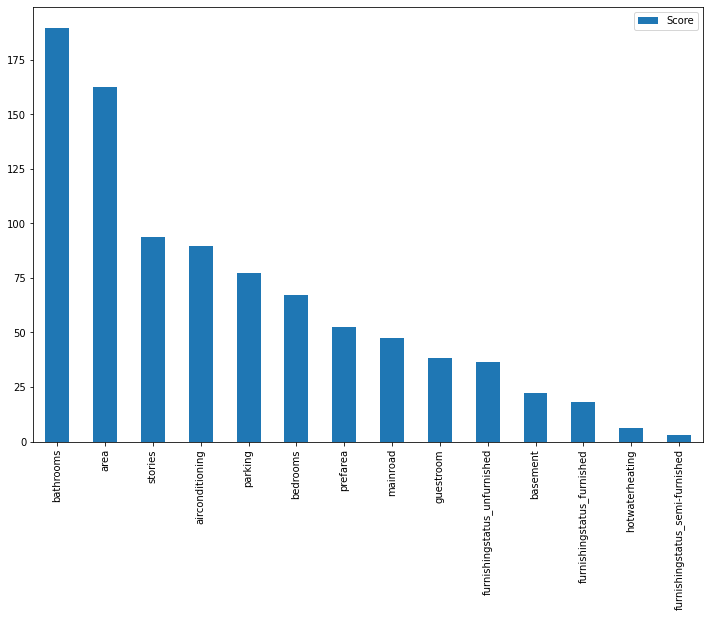

In [28]:
fs_score.plot(kind = 'bar', figsize=(12,8))

In [29]:
fs_score/fs_score.sum()*100

,Score
bathrooms,20.964868
area,17.957951
stories,10.370162
airconditioning,9.912247
parking,8.534443
bedrooms,7.418881
prefarea,5.815915
mainroad,5.266675
guestroom,4.224367
furnishingstatus_unfurnished,4.019713


In [30]:
cum_fs_score = fs_score.cumsum()

In [31]:
Perc_cum_fs_score = (cum_fs_score/fs_score.sum())*100

In [32]:
# Important feature based upon 85% of Total Score 
Perc_cum_fs_score[Perc_cum_fs_score['Score'] <= 85]

,Score
bathrooms,20.964868
area,38.922820
stories,49.292981
airconditioning,59.205229
parking,67.739672
bedrooms,75.158553
prefarea,80.974468
